# Evaluation Project - 3
Avacado Project
Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold




In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
(df.loc[0:]=="").sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
(df.loc[0:]==0).sum()

Unnamed: 0        432
Date                0
AveragePrice        0
Total Volume        0
4046              242
4225               61
4770             5497
Total Bags         15
Small Bags        159
Large Bags       2370
XLarge Bags     12048
type                0
year                0
region              0
dtype: int64

In [7]:
df_con = df.loc[df["Total Bags"] == 0]
df_con

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9212,34,2015-05-03,2.03,3976.19,1325.62,2650.57,0.00,0.0,0.0,0.0,0.0,organic,2015,Atlanta
11024,26,2015-06-28,1.53,41116.32,7314.21,33780.38,21.73,0.0,0.0,0.0,0.0,organic,2015,Portland
11320,10,2015-10-18,2.79,12642.11,961.55,11680.56,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11321,11,2015-10-11,2.66,14031.73,1046.84,12984.89,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11333,23,2015-07-19,2.36,19558.81,3893.65,15665.16,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11347,37,2015-04-12,1.54,28220.45,18887.66,9332.79,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11348,38,2015-04-05,1.55,26530.70,17104.69,9426.01,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11387,25,2015-07-05,1.98,29929.57,8841.34,20807.76,280.47,0.0,0.0,0.0,0.0,organic,2015,Seattle
11388,26,2015-06-28,1.71,46229.47,8112.46,37972.31,144.70,0.0,0.0,0.0,0.0,organic,2015,Seattle
11594,24,2015-07-12,2.07,2786.45,680.60,2105.85,0.00,0.0,0.0,0.0,0.0,organic,2015,Spokane


In [8]:
df["Total Bags"]=df["Total Bags"].replace(0,np.nan)   #total bags cannot be zero
df.isnull().sum()

Unnamed: 0       0
Date             0
AveragePrice     0
Total Volume     0
4046             0
4225             0
4770             0
Total Bags      15
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64

In [9]:
df["Total Bags"]=df["Total Bags"].fillna(np.mean(df["Total Bags"]))
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
df.head(25)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [11]:
df["Month"] = np.nan
months_dict = {"Jan" : "01",
               "Feb" : "02", 
               "Mar" : "03",
               "Apr" : "04",
               "May" : "05",
               "Jun" : "06",
               "Jul" : "07",
               "Aug" : "08",
               "Sep" : "09",
               "Oct" : "10",
               "Nov" : "11",
               "Dec" : "12"}

months_key_list = list(months_dict.keys())
months_value_list = list(months_dict.values())

for index in range(df.shape[0]):
    date = df.loc[index, "Date"]
    month = date.split("-")[1]
    i = months_value_list.index(month)
    df.loc[index, "Month"] = months_key_list[i]
    
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Dec
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Dec
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Dec
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Dec
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Feb
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Jan
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Jan
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Jan


In [12]:
df["Month"].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [13]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [15]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# EDA

Text(0.5, 1.0, 'Types of Avocados')

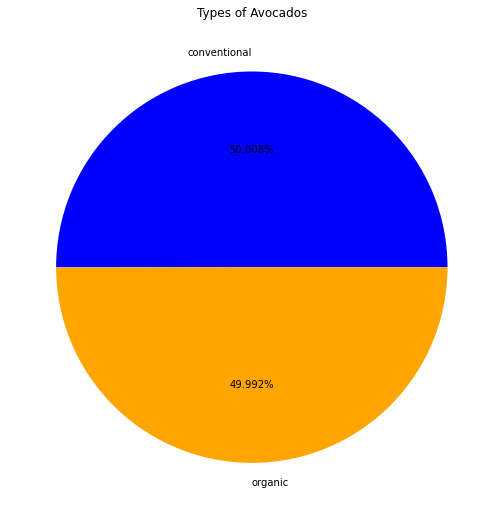

In [16]:
count=df["type"].value_counts()
plt.figure(figsize=(9,9))
plt.pie(data=count,x=count.values,labels=count.index,colors=["blue","orange"],autopct="%0.3f%%")
plt.title("Types of Avocados")


    
organic and conventional are present in alomost equal ratios.

Text(0.5, 1.0, 'Year')

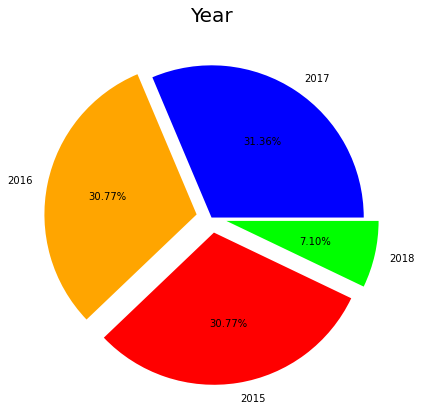

In [17]:
count=df["year"].value_counts()
explode = [0, 0.1,0.1,0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["blue","orange","red","lime"],autopct="%0.2f%%",explode=explode)
plt.title("Year",size=20)


    
1. Most avocados were sold in the year 2017 followed by 2016 and 2015.


2. The sales of avocado have dropped drastically in 2018.
    

Text(0.5, 1.0, 'Month')

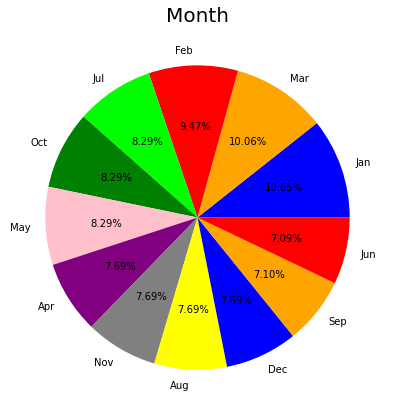

In [18]:
count=df["Month"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["blue","orange","red","lime","green","pink","purple","grey","yellow"],autopct="%0.2f%%")
plt.title("Month",size=20)


    
1. Most avocados are bought in the month of January across the years 2015-2018.


2. The least avocados are bought in the month of June across the years 2015-2018.


3. The first two quarters of the year account for 53% of the sale across the years 2015-2018. 


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

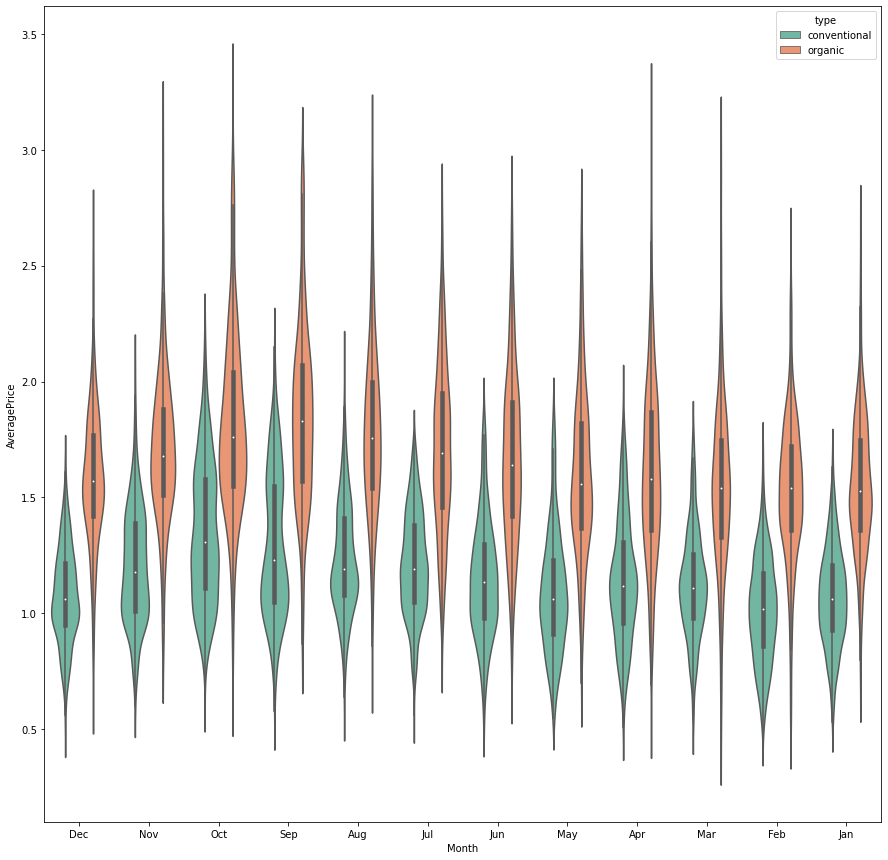

In [19]:
plt.subplots(figsize=(15,15))
sns.violinplot(x="Month",y="AveragePrice",data=df,hue="type",palette="Set2")


    
1. Across all months organic type of avocados are priced more than conventional. 


2. Avocado prices have peaked in the month of october for both types. 


3. December, January and February have recorded the least prices for both types.


4. March has recorded the least average price for organic type.

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

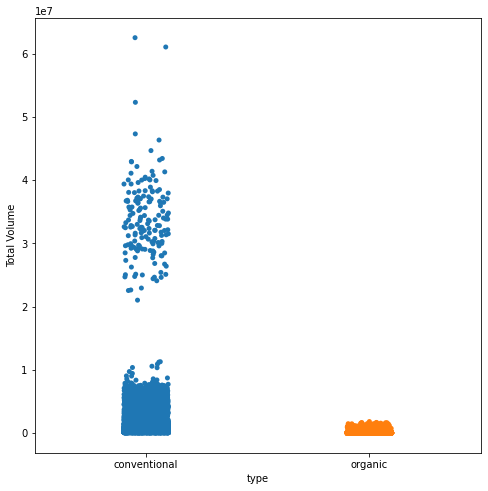

In [20]:
plt.subplots(figsize=(8,8))
sns.stripplot(x="type",y="Total Volume",data=df)


    
Higher volumes of conventional type are sold than organic type.

<AxesSubplot:xlabel='type', ylabel='Total Bags'>

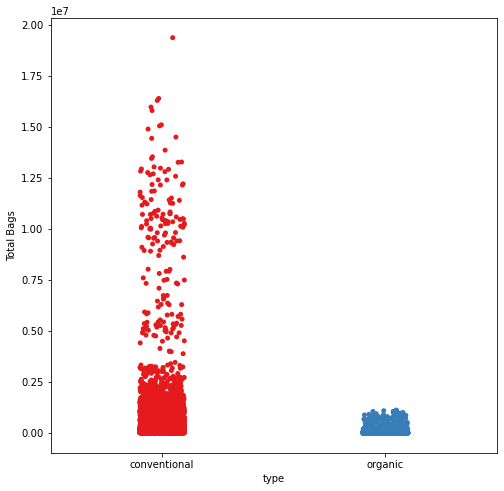

In [21]:
plt.subplots(figsize=(8,8))
sns.stripplot(x="type",y="Total Bags",data=df,palette="Set1")


    
Higher bags of conventional are sold compared to organic.

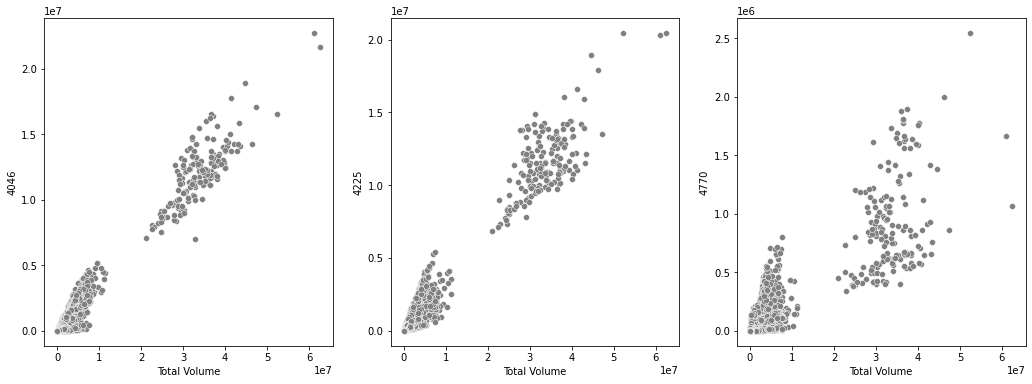

In [23]:
plt.figure(figsize=[30,35])
val=df.iloc[:,4:7]
for i,column in enumerate (val.columns):
    plt.subplot(5,5,i+1)
    sns.scatterplot(x="Total Volume",y=df[column],data=df,color="grey")

Observation:
    
1. There is an increase in total volume as 4046,4225 and 4770 increases. 

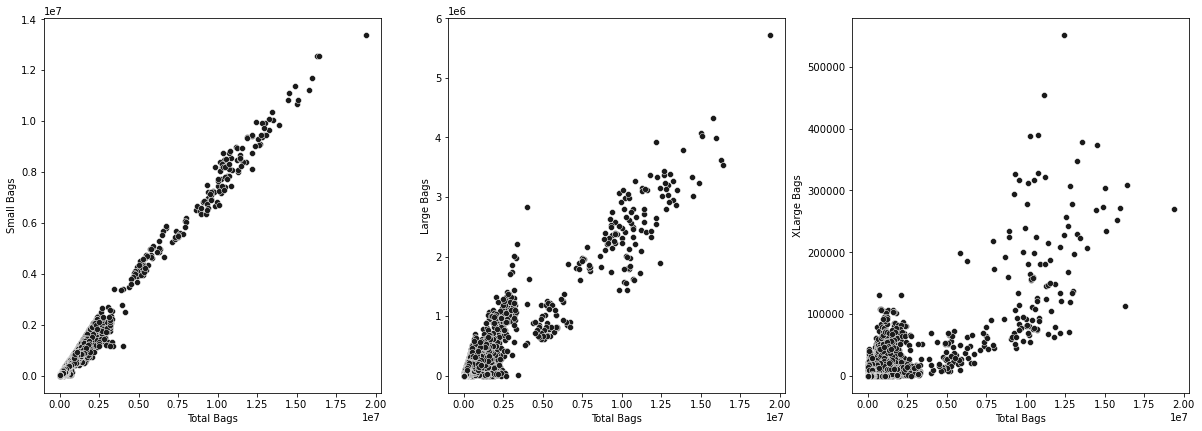

In [24]:
plt.figure(figsize=[35,40])
val=df.iloc[:,8:11]
for i,column in enumerate (val.columns):
    plt.subplot(5,5,i+1)
    sns.scatterplot(x="Total Bags",y=df[column],data=df,color="0.1")


    
1. Total number of the bags increases with increase in small,large and XL bags. 


2. XL bags have a flatter curve compared to Large bags. 


3. Large bags have a flatter curve compared to small bags. 


4. This indicates small bags were constant increase in total bags. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(0, 1, 'Atlanta'),
  Text(0, 2, 'BaltimoreWashington'),
  Text(0, 3, 'Boise'),
  Text(0, 4, 'Boston'),
  Text(0, 5, 'BuffaloRochester'),
  Text(0, 6, 'California'),
  Text(0, 7, 'Charlotte'),
  Text(0, 8, 'Chicago'),
  Text(0, 9, 'CincinnatiDayton'),
  Text(0, 10, 'Columbus'),
  Text(0, 11, 'DallasFtWorth'),
  Text(0, 12, 'Denver'),
  Text(0, 13, 'Detroit'),
  Text(0, 14, 'GrandRapids'),
  Text(0, 15, 'GreatLakes'),
  Text(0, 16, 'HarrisburgScranton'),
  Text(0, 17, 'HartfordSpringfield'),
  Text(0, 18, 'Houston'),
  Text(0, 19, 'Indianapolis'),
  Text(0, 20, 'Jacksonville'),
  Text(0, 21, 'LasVegas'),
  Text(0, 22, 'LosAngeles'),
  Text(0, 23, 'Louisville'),
  Text(0, 24, 'MiamiFtLauderdale'),
  Text(0, 25, 'M

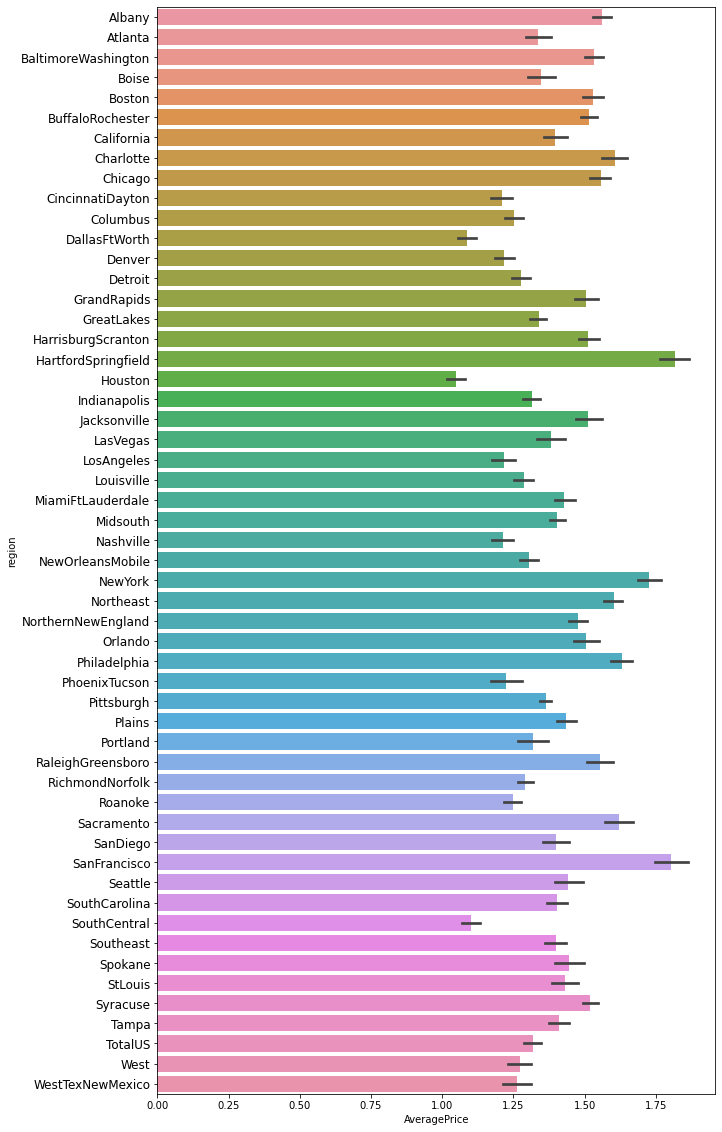

In [25]:
plt.figure(figsize = (10, 20))
sns.barplot(x="AveragePrice",y="region",data=df)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)


    
1. Hartford Spring field has the highest average price per piece in all the regions.


2. Houston has the least average pricr per piece in all the regions.

Text(0.5, 1.0, 'Organic avocado')

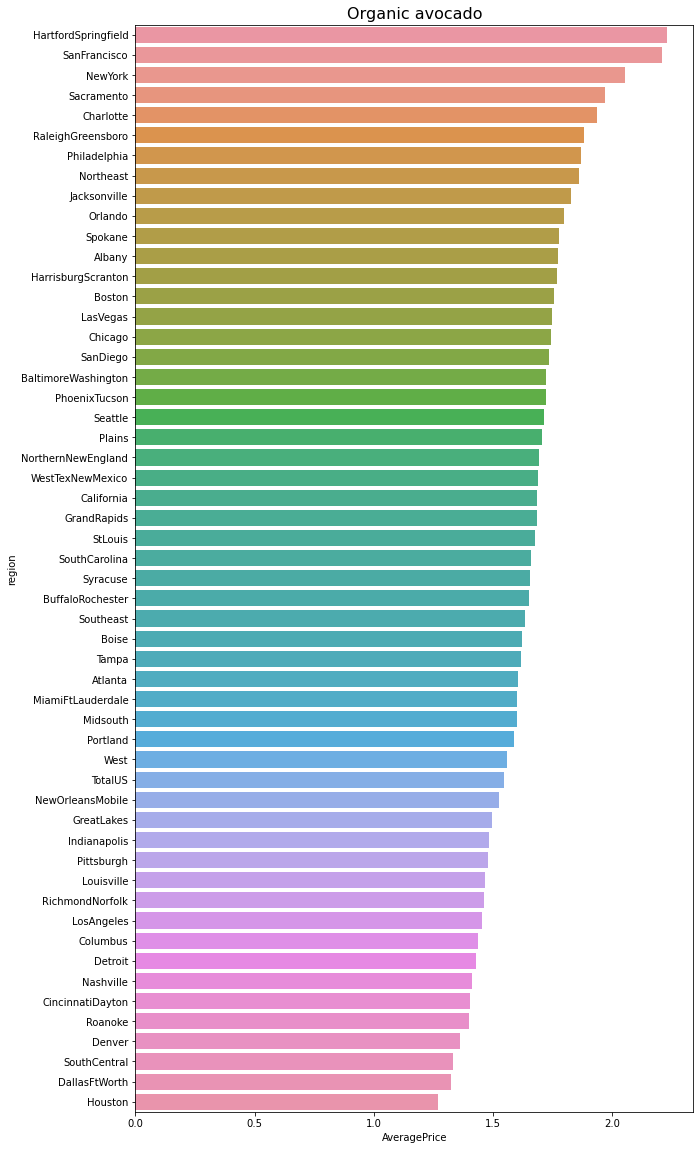

In [26]:
df_org = df.loc[df["type"] == "organic"]
df_r = df_org.groupby(["region"])[["AveragePrice"]].mean().sort_values(by = "AveragePrice", ascending = False)

plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "AveragePrice", y = df_r.index)
plt.title("Organic avocado", size = 16)


    
1. Hartford springfield has the highest average price per piece in all the regions for Organic avocados.


2. Houston has the lowest average price per piece in all the regions for Organic avocados.

Text(0.5, 1.0, 'Conventional avocado')

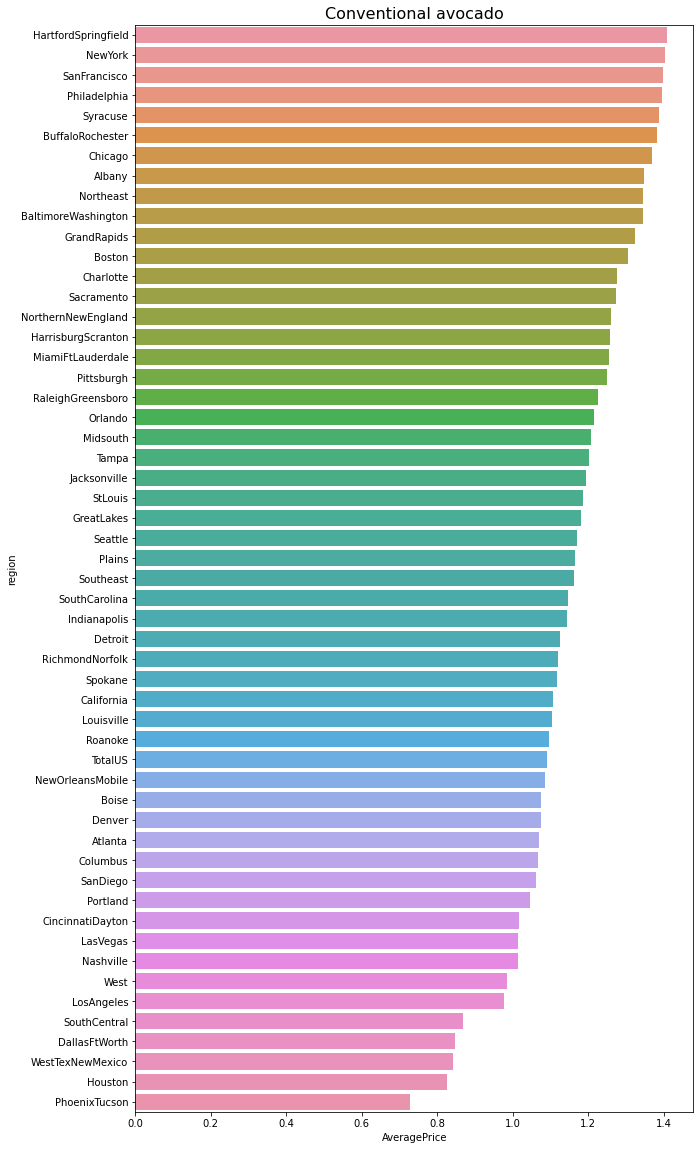

In [27]:
df_con = df.loc[df["type"] == "conventional"]
df_r = df_con.groupby(["region"])[["AveragePrice"]].mean().sort_values(by = "AveragePrice", ascending = False)

plt.figure(figsize = (10, 20))
sns.barplot(data = df_r, x = "AveragePrice", y = df_r.index)
plt.title("Conventional avocado", size = 16)


    
1. Hartford springfield has the highest average price per piece in all the regions for Conventional avocados.


2. Phoenix Tucson has the lowest average price per piece in all the regions for Conventional avocados.


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

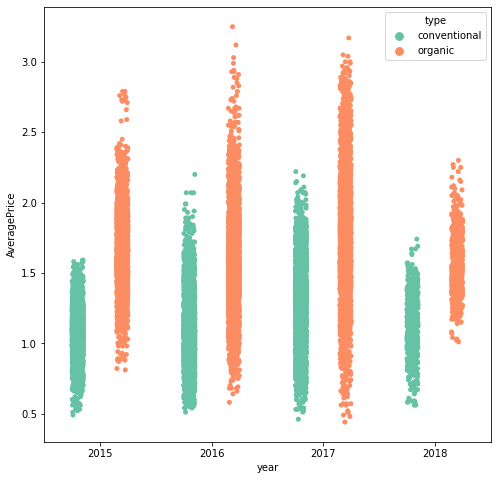

In [28]:
plt.subplots(figsize=(8,8))
sns.stripplot(x="year",y="AveragePrice",data=df,hue="type",dodge=True,palette="Set2")


    
1. year of 2016 has recorded the highest average price per piece of an avocado. 


2. Although 2016 has the highest average price 2017 has recorded a more evenly distributed average price across the price variations.Indiacting both higher sales and consistent demand.


3. 2018 has seen a great drop in the Average price.

 
4. Highest average price is of organic type in the year 2016


5. Lowest average price is also recorded in 2017. 


6. Lowest average price is of organic type in the year 2017

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

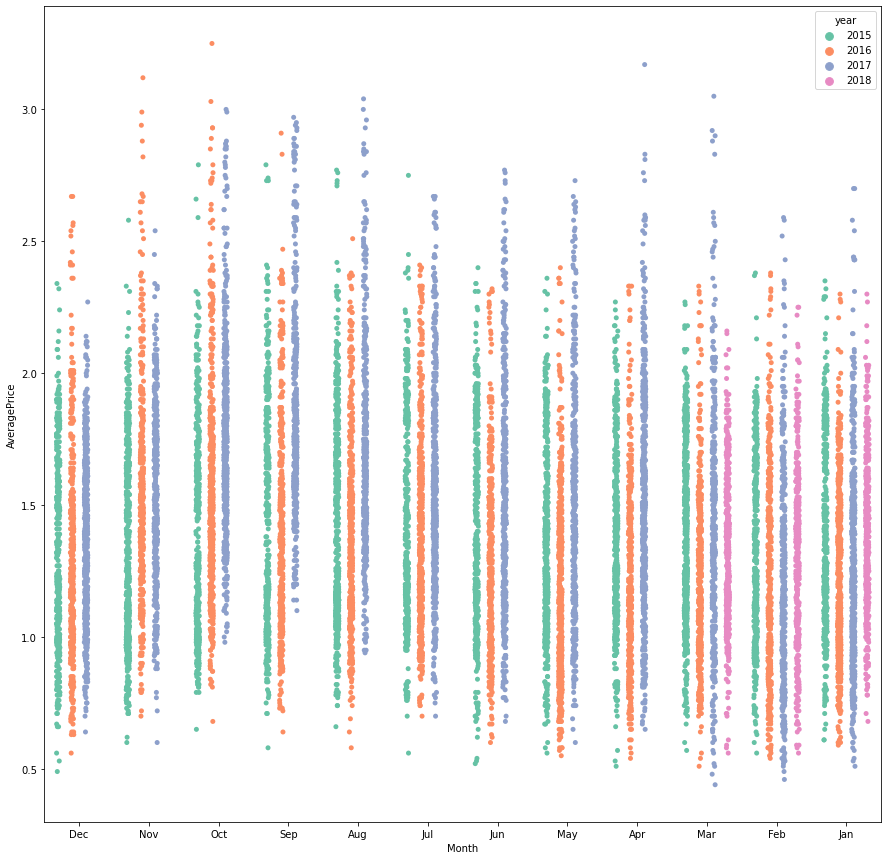

In [29]:
plt.subplots(figsize=(15,15))
sns.stripplot(x="Month",y="AveragePrice",hue="year",data=df,dodge=True,palette="Set2")


    
1. highest average price per piece was recorded on October 2016.


2. Least average price per piece is recorded on March 2017.


3. In 2015, highest avg price was in October while the least was in December.


4. In 2016, highest avg price was in October while the least was in March.


5. In 2017, highest avg price was in April while the least was in December.


6. In 2018, highest avg price was in January while the least was in March.

Text(0.5, 1.0, 'Monthly observations of average price')

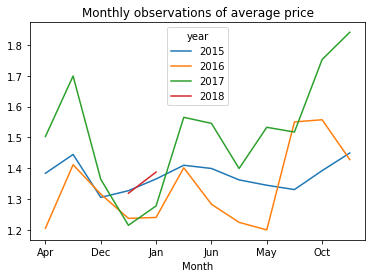

In [30]:
df_m=df.groupby(by=["Month","year"]).mean()
p=df_m["AveragePrice"]
p.unstack().plot(kind="line")
plt.title("Monthly observations of average price")


    
Evidently there was a spike in the average price in the year 2017. 

# Label encoder

In [31]:
import sklearn 
from sklearn.preprocessing import LabelEncoder 

lencode=LabelEncoder()
df["type"]=lencode.fit_transform(df["type"])
df["year"]=lencode.fit_transform(df["year"])
df["region"]=lencode.fit_transform(df["region"])
df["Month"]=lencode.fit_transform(df["Month"])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,2
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,2
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,2
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,2
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53,3
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53,4
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53,4
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53,4


In [32]:
df["Month"].unique()

array([ 2,  9, 10, 11,  1,  5,  6,  8,  0,  7,  3,  4])

In [33]:
df["type"].unique()

array([0, 1])

In [34]:
df["year"].unique()

array([0, 1, 2, 3], dtype=int64)

In [35]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [36]:
df=df.drop(["Unnamed: 0","Date"],axis=1)  #unnamed is an unnecessary columns and Date is already taken note as month.
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,2
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,2
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,2
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,2
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53,4
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53,4
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53,4


In [37]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.176847,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.119089
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963022,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.012003
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920033,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.013348
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905762,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.008662
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792291,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.012535
Total Bags,-0.176847,0.963022,0.920033,0.905762,0.792291,1.000000,0.994310,0.942987,0.804217,-0.217594,0.071310,0.175447,-0.012969
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994310,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.013886
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.942987,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.008635
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804217,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.018272
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217594,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000038



    
1. Month as the highest correaltion with Average price. 


2. Large bags have the highest correlation with region.


3. Multi-colinearity is present 

In [38]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.398363e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644,5.449833
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862184e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.347808
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.090000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.108010e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.992521e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000,5.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.112384e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000,8.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000,11.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1)
memory usage: 1.6 MB


# Checking outliers and skewness

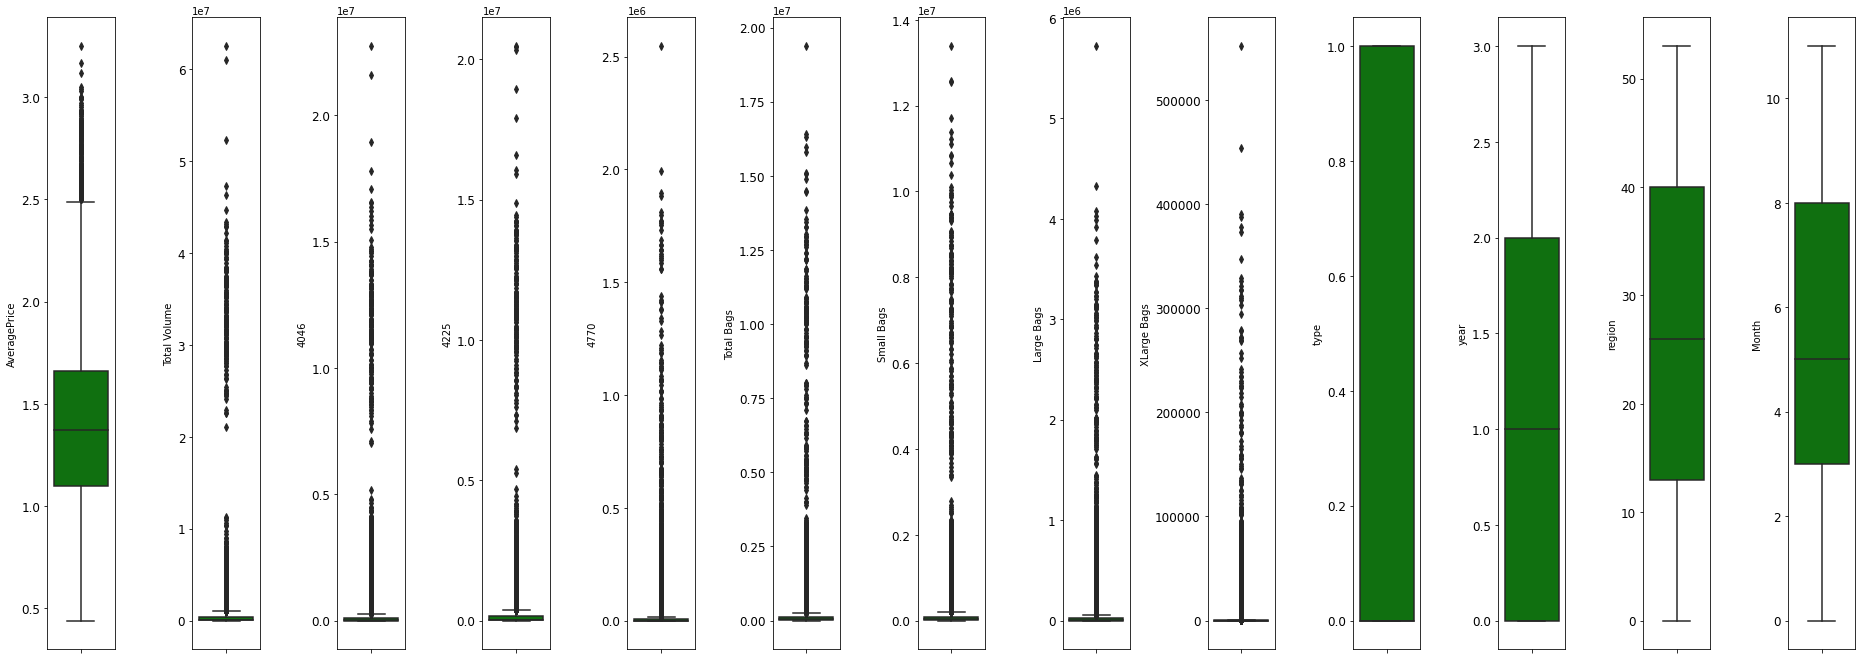

In [40]:
#check for outliers
collist=df.columns.values
ncol=15 #no.of columns and rows to display the graphs i.e max col and max row
nrows=10
plt.figure(figsize=(2*ncol,6*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="green",orient="v")
    plt.tight_layout()
    plt.yticks(fontsize=12)


    
All values have outliers apart from type,year,region and Month.

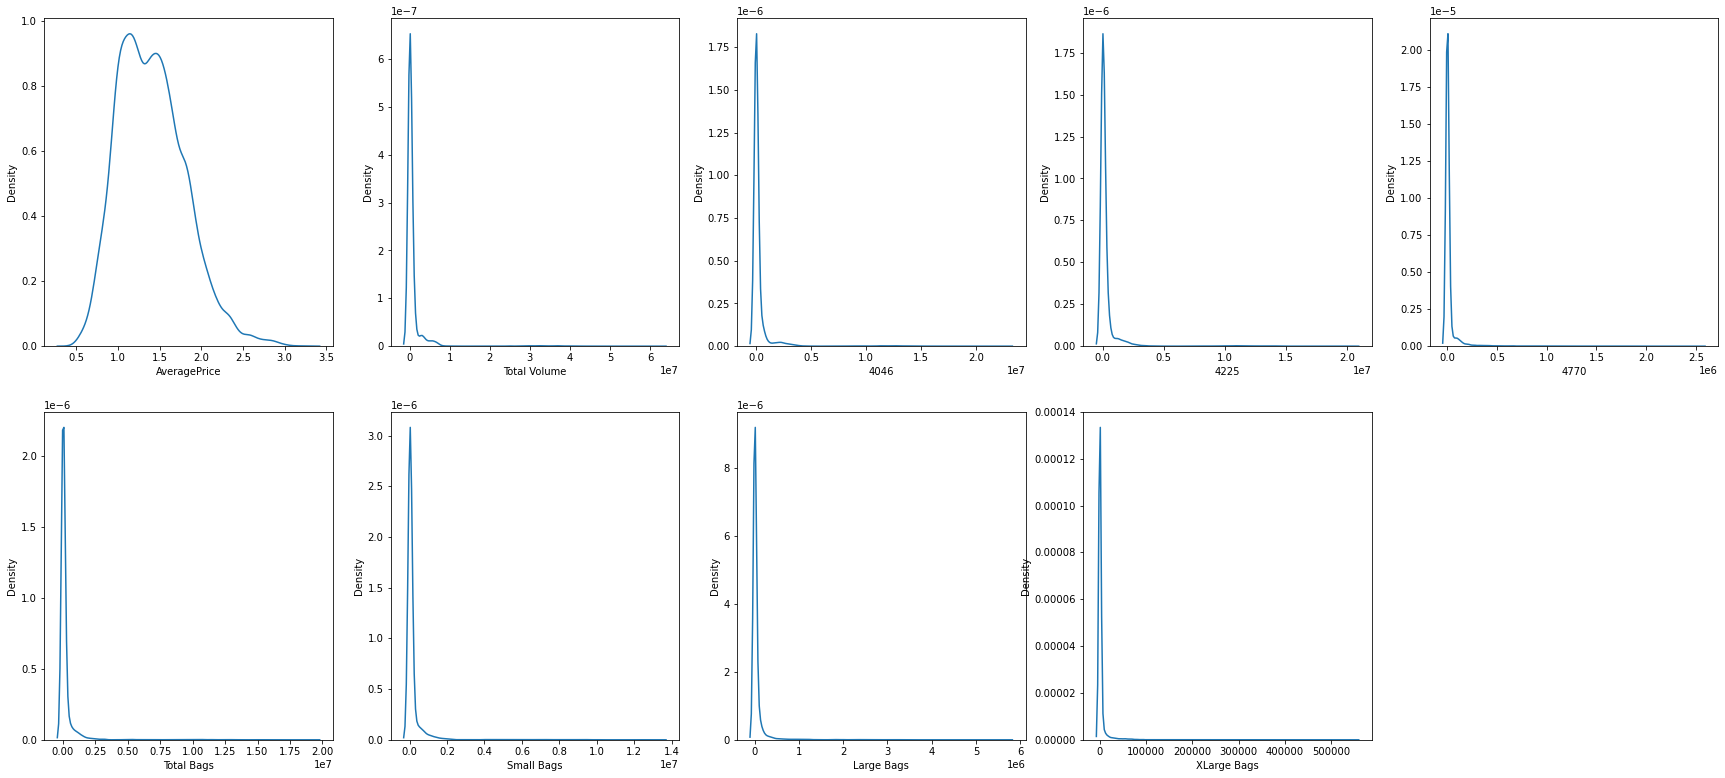

In [41]:
#check for skewness
plt.figure(figsize=[30,35])
for i,column in enumerate (df.iloc[:,0:9].columns):
    plt.subplot(5,5,i+1)
    sns.kdeplot(x=df[column])

In [42]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756195
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.027653
dtype: float64

In [43]:
df.iloc[:,1:9]=np.sqrt(df.iloc[:,1:9])
df.skew()

AveragePrice    0.580303
Total Volume    3.986597
4046            3.952972
4225            3.896355
4770            4.128605
Total Bags      4.127845
Small Bags      4.035940
Large Bags      4.134963
XLarge Bags     4.827368
type            0.000329
year            0.215339
region          0.000030
Month           0.027653
dtype: float64

In [44]:
df.iloc[:,1:9]=np.sqrt(df.iloc[:,1:9])
df.skew()

AveragePrice    0.580303
Total Volume    1.531126
4046            1.541756
4225            1.387105
4770            1.471863
Total Bags      1.549590
Small Bags      1.436095
Large Bags      1.282049
XLarge Bags     2.042621
type            0.000329
year            0.215339
region          0.000030
Month           0.027653
dtype: float64

# Data Cleaning

In [45]:
#for regression model, target= average price
x_r=df.iloc[:,1:]
y_r=df.iloc[:,0]
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def c_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [46]:
c_vif(x_r)

,variables,VIF
0,Total Volume,608.177929
1,4046,51.532322
2,4225,112.296863
3,4770,8.409109
4,Total Bags,298.506700
5,Small Bags,146.571934
6,Large Bags,14.655207
7,XLarge Bags,3.250650
8,type,2.781897
9,year,3.174981


In [47]:
df=df.drop(["Total Volume"],axis=1)
df

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,5.674368,15.275982,2.634339,9.656967,9.630976,3.107508,0.0,0,0,0,2
1,1.35,5.095773,14.535439,2.763586,9.874030,9.848614,3.142245,0.0,0,0,0,2
2,0.93,5.309466,18.176305,3.379890,9.500084,9.469866,3.186814,0.0,0,0,0,2
3,1.08,5.800449,16.379383,2.918799,8.731035,8.680353,3.400804,0.0,0,0,0,2
4,1.28,5.539273,14.469837,2.950453,8.867812,8.796074,3.749697,0.0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,6.726317,6.253398,0.000000,10.778858,10.691594,4.558618,0.0,1,3,53,3
18245,1.71,5.875458,7.653692,0.000000,9.810914,9.723774,4.245257,0.0,1,3,53,4
18246,1.87,5.875729,7.037446,5.194263,9.844959,9.833855,2.550414,0.0,1,3,53,4
18247,1.93,6.251792,7.389107,5.192603,10.234040,10.222358,2.659148,0.0,1,3,53,4


In [48]:
x_r=df.iloc[:,1:]
y_r=df.iloc[:,0]
c_vif(x_r)

,variables,VIF
0,4046,14.555939
1,4225,22.147927
2,4770,8.359918
3,Total Bags,238.597434
4,Small Bags,144.559140
5,Large Bags,14.652551
6,XLarge Bags,3.210765
7,type,2.701087
8,year,3.165839
9,region,4.079354


removing outliers

In [49]:
import scipy
from scipy.stats import zscore 
z=np.abs(zscore(df))
z.shape

(18249, 12)

In [50]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 12)
(17483, 12)


In [51]:
#data loss 
(18249-17483)/18249*100

4.197490273439641

data loss is less than 10% we can proceed. 

# Regression Model

In [52]:
y_r=df_new.iloc[:,0]
x_r=df_new.iloc[:,1:]

In [53]:
print(y_r.shape)
print(x_r.shape)

(17483,)
(17483, 11)


In [54]:
#removing skewness 
from sklearn.preprocessing import power_transform 
x_r=power_transform(x_r,method="yeo-johnson")
x_r

array([[-0.65714719,  0.36535   , -0.10179314, ..., -1.29481496,
        -2.00751822, -1.00713485],
       [-0.77126349,  0.28160786, -0.0675171 , ..., -1.29481496,
        -2.00751822, -1.00713485],
       [-0.72817852,  0.67049322,  0.08277596, ..., -1.29481496,
        -2.00751822, -1.00713485],
       ...,
       [-0.61922833, -0.7777286 ,  0.43588712, ...,  1.70064588,
         1.5781899 , -0.35059759],
       [-0.55065257, -0.71553761,  0.43560883, ...,  1.70064588,
         1.5781899 , -0.35059759],
       [-0.36740595, -0.79039574,  0.18960386, ...,  1.70064588,
         1.5781899 , -0.35059759]])

In [55]:
df_new.skew()

AveragePrice    0.371471
4046            1.064237
4225            0.837983
4770            1.059387
Total Bags      0.793064
Small Bags      0.743100
Large Bags      0.709539
XLarge Bags     1.713731
type           -0.057341
year            0.237451
region          0.009071
Month           0.028363
dtype: float64

# Preprocessing 

In [56]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_r=ms.fit_transform(x_r)
x_r

array([[0.39320237, 0.60708784, 0.35966183, ..., 0.        , 0.        ,
        0.24009723],
       [0.37032704, 0.59182033, 0.37013354, ..., 0.        , 0.        ,
        0.24009723],
       [0.3789637 , 0.66272027, 0.41604971, ..., 0.        , 0.        ,
        0.24009723],
       ...,
       [0.40080345, 0.39868658, 0.52392904, ..., 1.        , 1.        ,
        0.43647623],
       [0.41454989, 0.41002498, 0.52384402, ..., 1.        , 1.        ,
        0.43647623],
       [0.45128283, 0.39637716, 0.4486868 , ..., 1.        , 1.        ,
        0.43647623]])

# LinearRegression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [58]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_r,y_r,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state=",i,'training accuracy =',r2_score(y_train,pred_train))
    print("At random state=",i,'testing accuracy =',r2_score(y_test,pred_test))
    print("\n")

At random state= 0 training accuracy = 0.5217924640448757
At random state= 0 testing accuracy = 0.512760057256445


At random state= 1 training accuracy = 0.5176438168980313
At random state= 1 testing accuracy = 0.5298549630195715


At random state= 2 training accuracy = 0.5197684313798958
At random state= 2 testing accuracy = 0.5215432552577136


At random state= 3 training accuracy = 0.5225512497951799
At random state= 3 testing accuracy = 0.51029409032741


At random state= 4 training accuracy = 0.5191540138507129
At random state= 4 testing accuracy = 0.5240251035639627


At random state= 5 training accuracy = 0.5190404709023747
At random state= 5 testing accuracy = 0.5234095295449304


At random state= 6 training accuracy = 0.518536379905749
At random state= 6 testing accuracy = 0.5262871628007629


At random state= 7 training accuracy = 0.5215187811124585
At random state= 7 testing accuracy = 0.5140347626842019


At random state= 8 training accuracy = 0.5217633583048564
At random 

In [59]:
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    lr_cv=cross_val_score(lr,x_r,y_r,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = -286.47666439661344 at cv = 2
Score = 1.7857827702369544 at cv = 3
Score = 3.597727867079789 at cv = 4
Score = 13.104094569159743 at cv = 5
Score = 4.890576973719622 at cv = 6
Score = 7.676192979792794 at cv = 7
Score = 9.73298337754865 at cv = 8
Score = 7.717333677396489 at cv = 9
Score = 9.859629694531527 at cv = 10


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_r,y_r,test_size=0.2)

# XGBRegressor

In [61]:
from xgboost import XGBRegressor

In [62]:
xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred=xgbr.predict(x_test)
r2_score(y_test,xgbr_pred)

0.8897319236871369

In [63]:
for i in range(2,11):
    lr_cv=cross_val_score(xgbr,x_r,y_r,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = -39.68069490409988 at cv = 2
Score = 31.035552094354497 at cv = 3
Score = 33.16129687376796 at cv = 4
Score = 40.432456502839834 at cv = 5
Score = 38.84172902557068 at cv = 6
Score = 50.831664558601084 at cv = 7
Score = 55.01022837834753 at cv = 8
Score = 57.43669956102574 at cv = 9
Score = 56.24087313602948 at cv = 10


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
import warnings 
warnings.filterwarnings("ignore")

# Ensemble 

In [65]:
from sklearn.ensemble import AdaBoostRegressor 
Ad=AdaBoostRegressor()
Ad.fit(x_train,y_train)
Ad.score(x_train,y_train)
pred_ad=Ad.predict(x_test)
r2_ad=r2_score(y_test,pred_ad)
r2_ad

0.5682373874679951

In [66]:
for i in range(2,11):
    lr_cv=cross_val_score(Ad,x_r,y_r,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = -118.79079663325666 at cv = 2
Score = -0.006867315984634044 at cv = 3
Score = -1.9454888404888155 at cv = 4
Score = 6.2395551728182985 at cv = 5
Score = -4.5573000862858075 at cv = 6
Score = 2.0802752971894076 at cv = 7
Score = 4.4276644553815 at cv = 8
Score = 7.7451231039968995 at cv = 9
Score = 10.762075615432835 at cv = 10


# RandomForestRegressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)
y_pred = regressor_rf.predict(x_test)
rf_r2=r2_score(y_test,y_pred)
rf_r2

0.868451382896802

In [68]:
for i in range(2,11):
    lr_cv=cross_val_score(regressor_rf,x_r,y_r,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = -101.67484418980646 at cv = 2
Score = 8.586570059032299 at cv = 3
Score = 14.122960780612273 at cv = 4
Score = 22.698991408641312 at cv = 5
Score = 23.171393021867548 at cv = 6
Score = 24.908465142236075 at cv = 7
Score = 37.388069137340516 at cv = 8
Score = 45.19727919861073 at cv = 9
Score = 45.632837853565974 at cv = 10


# KNeighborsRegressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
kNeighborsRegressor = KNeighborsRegressor()
kNeighborsRegressor.fit(x_train,y_train)
y_pred_kn = kNeighborsRegressor.predict(x_test)
r2_score(y_test,y_pred_kn)

0.8083079662984818

In [71]:
for i in range(2,11):
    lr_cv=cross_val_score(kNeighborsRegressor,x_r,y_r,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = -204.4262164476683 at cv = 2
Score = -15.79693097113707 at cv = 3
Score = -15.359818235045191 at cv = 4
Score = 3.8760088146307625 at cv = 5
Score = -9.792638021563862 at cv = 6
Score = -4.029189709002557 at cv = 7
Score = -5.495534596149742 at cv = 8
Score = 2.3647259301665113 at cv = 9
Score = -3.705740630358249 at cv = 10


# SVR

In [72]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
r2_score(y_test,y_pred_svr)

0.7209385070169141

In [73]:
for i in range(2,11):
    lr_cv=cross_val_score(svr,x_r,y_r,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = -111.59112392194332 at cv = 2
Score = -52.71751031063992 at cv = 3
Score = -4.970048545985353 at cv = 4
Score = -1.9182176361845715 at cv = 5
Score = 5.972944757508993 at cv = 6
Score = 19.36057306337049 at cv = 7
Score = 28.226626176963887 at cv = 8
Score = 32.348789483803905 at cv = 9
Score = 30.21129617531308 at cv = 10


# Hyper paramter tuning 

In [74]:
from sklearn.model_selection import GridSearchCV
param = {"n_estimators":[50,100,150,200],"eta":[0.1,1,10],"max_depth":[5,10,15],"subsample":[0.5,1,1.5,2]}
clf = GridSearchCV(XGBRegressor(),param_grid=param)

In [75]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [76]:
print(clf.best_params_)

{'eta': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.5}


In [77]:
xgbr=XGBRegressor(eta=0.1,max_depth=10,n_estimators=200,subsample=0.5)
xgbr.fit(x_train,y_train)
xgbr_pred=xgbr.predict(x_test)
r2_score(y_test,xgbr_pred)

0.904319300433384

In [78]:
for i in range(2,11):
    lr_cv=cross_val_score(xgbr,x_r,y_r,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = -44.67982633543597 at cv = 2
Score = 28.30194660737652 at cv = 3
Score = 24.711418282147612 at cv = 4
Score = 35.579037252847115 at cv = 5
Score = 32.66302737913034 at cv = 6
Score = 41.476252397673015 at cv = 7
Score = 46.30654759344927 at cv = 8
Score = 52.987848140742244 at cv = 9
Score = 53.64127235033009 at cv = 10


In [79]:
lr_cv=cross_val_score(xgbr,x_r,y_r,cv=10)
lrs=lr_cv.mean()
print("CV Score =",lrs*100,"at cv =",i)
print("Accuracy_score =",r2_score(y_test,xgbr_pred)*100)

CV Score = 53.64127235033009 at cv = 10
Accuracy_score = 90.43193004333841


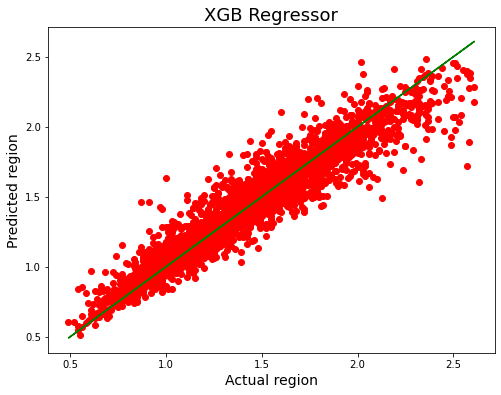

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=xgbr_pred,color="r")
plt.plot(y_test,y_test,color="g")
plt.xlabel("Actual region",fontsize=14)
plt.ylabel("Predicted region",fontsize=14)
plt.title("XGB Regressor",fontsize=18)
plt.show()

# Model saving 

In [81]:
import pickle 
filename= "avo_reg.pkl"
pickle.dump(xgbr, open(filename,"wb"))

# Conclusion

In [82]:
a=np.array(y_test)
predicted = np.array(xgbr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,1.14,1.215991
1,1.81,1.667622
2,1.71,1.554689
3,1.12,1.012131
4,1.14,1.420500
...,...,...
3492,1.01,1.016592
3493,1.25,1.097982
3494,1.00,0.979399
3495,1.72,1.490931


# Classification model

In [83]:
y_c=df_new.iloc[:,-2]
x_c=df_new.drop(["Month"],axis=1)

In [84]:
print(y_c.shape)
print(x_c.shape)

(17483,)
(17483, 11)


In [85]:
#removing skewness 
from sklearn.preprocessing import power_transform 
x_c=power_transform(x_c,method="yeo-johnson")
x_c

array([[-0.12662385, -0.65714719,  0.36535   , ..., -1.02907903,
        -1.29481496, -2.00751822],
       [-0.07310626, -0.77126349,  0.28160786, ..., -1.02907903,
        -1.29481496, -2.00751822],
       [-1.30619362, -0.72817852,  0.67049322, ..., -1.02907903,
        -1.29481496, -2.00751822],
       ...,
       [ 1.17830004, -0.61922833, -0.7777286 , ...,  0.97174267,
         1.70064588,  1.5781899 ],
       [ 1.3077999 , -0.55065257, -0.71553761, ...,  0.97174267,
         1.70064588,  1.5781899 ],
       [ 0.6078135 , -0.36740595, -0.79039574, ...,  0.97174267,
         1.70064588,  1.5781899 ]])

# Preprocessing 

In [86]:
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()
x_c=ms.fit_transform(x_c)
x_c

array([[-0.12662385, -0.65714719,  0.36535   , ..., -1.02907903,
        -1.29481496, -2.00751822],
       [-0.07310626, -0.77126349,  0.28160786, ..., -1.02907903,
        -1.29481496, -2.00751822],
       [-1.30619362, -0.72817852,  0.67049322, ..., -1.02907903,
        -1.29481496, -2.00751822],
       ...,
       [ 1.17830004, -0.61922833, -0.7777286 , ...,  0.97174267,
         1.70064588,  1.5781899 ],
       [ 1.3077999 , -0.55065257, -0.71553761, ...,  0.97174267,
         1.70064588,  1.5781899 ],
       [ 0.6078135 , -0.36740595, -0.79039574, ...,  0.97174267,
         1.70064588,  1.5781899 ]])

# SMOTE

In [87]:
from imblearn.over_sampling import SMOTE 
smt=SMOTE()
trainx_c,trainy_c=smt.fit_resample(x_c,y_c)

In [88]:
trainy_c.value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
53    338
6     338
47    338
Name: region, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train_c,x_test_c,y_train_c,y_test_c=train_test_split(trainx_c,trainy_c,test_size=0.2,random_state=42)

# DecisionTreeClassifier 

In [91]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [94]:
dt=DecisionTreeClassifier()
dt.fit(x_train_c,y_train_c)

pred_test_dt=dt.predict(x_test_c)
acc_test_dt=accuracy_score(pred_test_dt,y_test_c)

pred_train_dt=dt.predict(x_train_c)
acc_train_dt=accuracy_score(pred_train_dt,y_train_c)

print("acc_test =",acc_test_dt)
print("acc_train =",acc_train_dt)

acc_test = 1.0
acc_train = 1.0


In [95]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(dt,trainx_c,trainy_c,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 100.0 at cv = 2
Score = 99.92329607714223 at cv = 3
Score = 100.0 at cv = 4
Score = 100.0 at cv = 5
Score = 100.0 at cv = 6
Score = 99.99452234881682 at cv = 7
Score = 100.0 at cv = 8
Score = 100.0 at cv = 9
Score = 99.9945235487404 at cv = 10


In [96]:
rf_cv=cross_val_score(dt,trainx_c,trainy_c,cv=9)
rfs=rf_cv.mean()
print("Score =",rfs*100)
print("acc_test =",acc_test_dt*100)

Score = 100.0
acc_test = 100.0


this is a perfect model.

# Hyper paramter tuning 

In [97]:
param = {"criterion":["gini","entropy"],"splitter":["best","random"],"random_state":[10,20,30]}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param)

In [98]:
clf.fit(x_train_c,y_train_c)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'random_state': [10, 20, 30],
                         'splitter': ['best', 'random']})

In [99]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'gini', 'random_state': 10, 'splitter': 'best'}
1.0


In [100]:
dt=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
dt.fit(x_train_c,y_train_c)

pred_test_dt=dt.predict(x_test_c)
acc_test_dt=accuracy_score(pred_test_dt,y_test_c)

pred_train_dt=dt.predict(x_train_c)
acc_train_dt=accuracy_score(pred_train_dt,y_train_c)

print("acc_test =",acc_test_dt)
print("acc_train =",acc_train_dt)

acc_test = 1.0
acc_train = 1.0


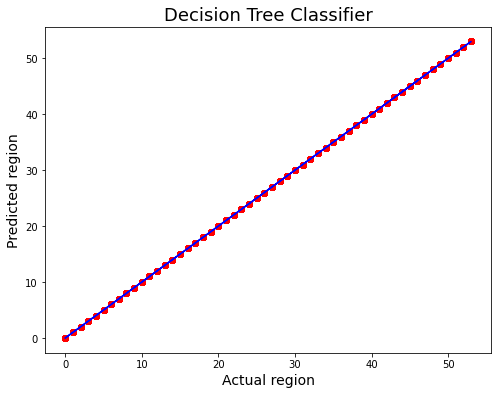

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_c,y=pred_test_dt,color="r")
plt.plot(y_test_c,y_test_c,color="b")
plt.xlabel("Actual region",fontsize=14)
plt.ylabel("Predicted region",fontsize=14)
plt.title("Decision Tree Classifier",fontsize=18)
plt.show()

# Model saving

In [102]:
import pickle 
filename= "avo_cl.pkl"
pickle.dump(dt, open(filename,"wb"))

# Conclusion

In [103]:
a=np.array(y_test_c)
predicted = np.array(dt.predict(x_test_c))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,43,43
1,52,52
2,10,10
3,30,30
4,32,32
...,...,...
3646,53,53
3647,51,51
3648,44,44
3649,22,22
